# Model Notebook
This is the notebook for model in age gender detector. Here, we will extract the data, train it and fit it into our model, and will evaluate our results and optimize the model for better results.

## Import the neccessory libraries 

In [80]:
import tensorflow as tf
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense,MaxPool2D,Conv2D
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam,Adagrad,Adadelta,Adamax,RMSprop


## Extract data from Dataset

If data has not been downloaded yet, download it from [Here](https://www.kaggle.com/datasets/jangedoo/utkface-new)

In [3]:
fldr="Resources/UTKFace"

In [4]:
import os
files=os.listdir(fldr)

## Create list of images from the dataset

In [5]:
ages=[]
genders=[]
images=[]

for fle in files:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    total=fldr+'/'+fle
    print(total)
    image=cv2.imread(total)
    
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(48,48))
    images.append(image)

Resources/UTKFace/100_0_0_20170112213500903.jpg.chip.jpg
Resources/UTKFace/100_0_0_20170112215240346.jpg.chip.jpg
Resources/UTKFace/100_1_0_20170110183726390.jpg.chip.jpg
Resources/UTKFace/100_1_0_20170112213001988.jpg.chip.jpg
Resources/UTKFace/100_1_0_20170112213303693.jpg.chip.jpg
Resources/UTKFace/100_1_0_20170112215032192.jpg.chip.jpg
Resources/UTKFace/100_1_0_20170117195420803.jpg.chip.jpg
Resources/UTKFace/100_1_0_20170119212053665.jpg.chip.jpg
Resources/UTKFace/100_1_2_20170105174847679.jpg.chip.jpg
Resources/UTKFace/100_1_2_20170112213615815.jpg.chip.jpg
Resources/UTKFace/100_1_2_20170112222336458.jpg.chip.jpg
Resources/UTKFace/101_0_0_20170112213500903.jpg.chip.jpg
Resources/UTKFace/101_1_2_20170105174739309.jpg.chip.jpg
Resources/UTKFace/103_0_2_20170112213001988.jpg.chip.jpg
Resources/UTKFace/105_0_0_20170112213001988.jpg.chip.jpg
Resources/UTKFace/105_1_0_20170112213001988.jpg.chip.jpg
Resources/UTKFace/105_1_0_20170112213021902.jpg.chip.jpg
Resources/UTKFace/105_1_0_20170

## Create List of Age and Gender from the dataset

In [6]:
for fle in files:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    ages.append(age)
    genders.append(gender)

### Viewing a Sample

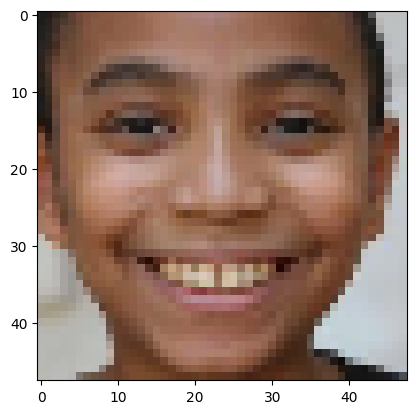

In [7]:
plt.imshow(images[87])

In [8]:
print(ages[87])

10


In [9]:
print(genders[87])

0


## Saving the Images array, Ages array, and Genders array in the System

In [10]:
images_f=np.array(images)
ages_f=np.array(ages)
genders_f=np.array(genders)

In [11]:
np.save(fldr+'image.npy',images_f)
np.save(fldr+'ages.npy',ages_f)
np.save(fldr+'genders.npy',genders_f)

# Finding the no. of Male and Female samples respectively

In [12]:
values, counts=np.unique(genders_f,return_counts=True)
print(counts)

[12391 11317]


# Plotting the no. of male and female samples

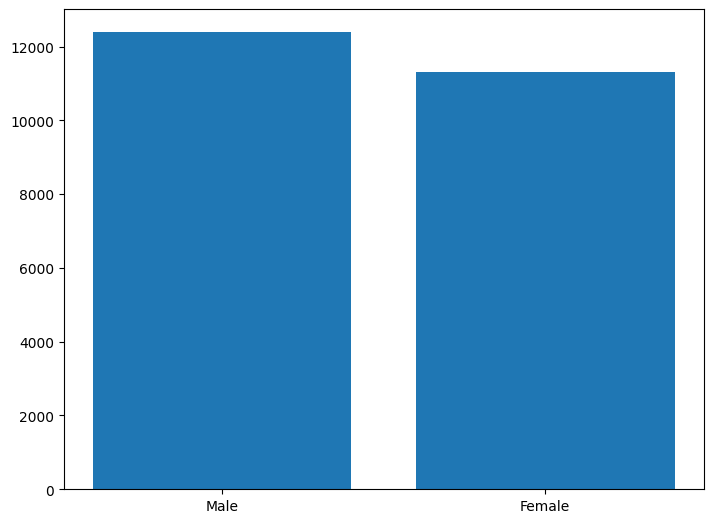

In [13]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1]) 
gender=['Male','Female']
values=[12391,11317]
ax.bar(gender,values)
plt.show()

# Finding the no. of samples in each age

In [14]:
values, counts=np.unique(ages_f,return_counts=True)
print(counts)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


### Converting Age counts to Lists

In [15]:
val=values.tolist()
cnt=counts.tolist()

# Plotting the samples agewise

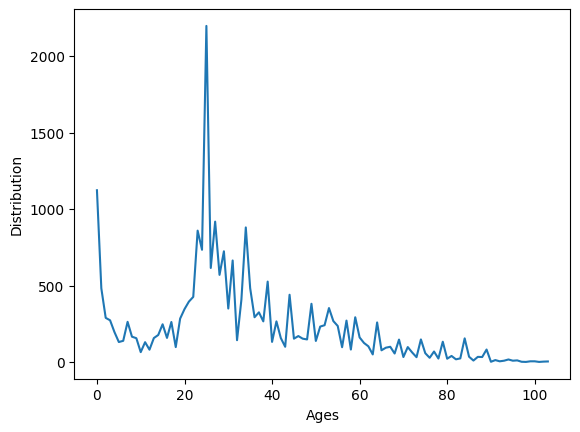

In [16]:
plt.plot(counts)
plt.xlabel('Ages')
plt.ylabel('Distribution')
plt.show()

### Defining labels for output

In [17]:
lables=[]
i=0
while i<len(ages):
    label=[]
    label.append(ages[i])
    label.append(genders[i])
    lables.append(label)
    i=i+1
    


### Creating another list of images from existing one For better learning 

In [18]:
images_f_2=images_f/255

In [19]:
images_f_2.shape

(23708, 48, 48, 3)

In [22]:
labels_f=np.array(lables)

## Splitting the Dataset into test and train

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,Y_train,Y_test=train_test_split(images_f_2,labels_f,test_size=0.25)

In [25]:
Y_train[0:10]

array([[ 1,  0],
       [90,  1],
       [ 8,  1],
       [16,  0],
       [36,  1],
       [30,  1],
       [33,  1],
       [26,  1],
       [18,  1],
       [31,  0]])

### Splitting 'Y test' and 'Y train' further for better understanding

In [26]:
Y_train_2=[Y_train[:,1],Y_train[:,0]]
Y_test_2=[Y_test[:,1],Y_test[:,0]]

In [27]:
Y_train_2[1][0:5]

array([ 1, 90,  8, 16, 36])

## Defining the Model

In [28]:
def Convolution(input_tensor, filters):
    x=Conv2D(filters=filters,kernel_size=(3,3),padding="same",strides=(1,1),kernel_regularizer=l2(0.001))(input_tensor)
    x=Dropout(0.1)(x)
    x=Activation('relu')(x)
    return x

In [29]:
def model(input_shape):
    inputs=Input((input_shape))
    conv_1=Convolution(inputs,32)
    maxp_1=MaxPool2D(pool_size=(2,2))(conv_1)
    conv_2=Convolution(maxp_1,64)
    maxp_2=MaxPool2D(pool_size=(2,2))(conv_2)
    conv_3=Convolution(maxp_2,128)
    maxp_3=MaxPool2D(pool_size=(2,2))(conv_3)
    conv_4=Convolution(maxp_3,256)
    maxp_4=MaxPool2D(pool_size=(2,2))(conv_4)
    flatten=Flatten()(maxp_4)
    dense_1=Dense(64,activation='relu')(flatten)
    dense_2=Dense(64,activation='relu')(flatten)
    drop_1=Dropout(0.2)(dense_1)
    drop_2=Dropout(0.2)(dense_2)
    output_1=Dense(1,activation='sigmoid',name='sex_out')(drop_1)
    output_2=Dense(1,activation='relu',name='age_out')(drop_2)
    model=Model(inputs=[inputs],outputs=[output_1,output_2])
    model.compile(loss=["binary_crossentropy","mae"],optimizer="Adam",metrics=['accuracy','accuracy'])
    return model

In [30]:
Model=model((48,48,3))

In [31]:
Model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 48, 48, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 48, 48,    │        896 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 48, 48,    │          0 │ conv2d[0][0]      │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 48, 48,    │          0 │ dropout[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 24, 24,    │          0 │ activation[0][0]  │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 24, 24,    │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 24, 24,    │          0 │ conv2d_1[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 24, 24,    │          0 │ dropout_1[0][0]   │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 12, 12,    │          0 │ activation_1[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 12, 12,    │     73,856 │ max_pooling2d_1[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 12, 12,    │          0 │ conv2d_2[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 12, 12,    │          0 │ dropout_2[0][0]   │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 6, 6, 128) │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 6, 6, 256) │    295,168 │ max_pooling2d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 6, 6, 256) │          0 │ conv2d_3[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 6, 6, 256) │          0 │ dropout_3[0][0]   │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 3, 3, 256) │          0 │ activation_3[0][… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 683,586 (2.61 MB)

 Trainable params: 683,586 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Initializing the Model

In [51]:
fle_s='Age_Sex_Detection.keras'
checkpoint=ModelCheckpoint(fle_s,monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False,mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=75,monitor='val_loss',restore_best_weights='True')
callback_list=[checkpoint,Early_stop]

## Running the Model 

In [56]:
History=Model.fit(X_train,Y_train_2,batch_size=64,validation_data=(X_test,Y_test_2),epochs=250,callbacks=callback_list)

Epoch 1/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - age_out_accuracy: 0.0460 - loss: 12.4092 - sex_out_accuracy: 0.6315
Epoch 1: val_loss improved from 19.04366 to 14.67207, saving model to Age_Sex_Detection.keras
278/278 ━━━━━━━━━━━━━━━━━━━━ 47s 171ms/step - age_out_accuracy: 0.0460 - loss: 12.4082 - sex_out_accuracy: 0.6316 - val_age_out_accuracy: 0.0466 - val_loss: 14.6721 - val_sex_out_accuracy: 0.7317
Epoch 2/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - age_out_accuracy: 0.0436 - loss: 11.1451 - sex_out_accuracy: 0.6874
Epoch 2: val_loss improved from 14.67207 to 13.36293, saving model to Age_Sex_Detection.keras
278/278 ━━━━━━━━━━━━━━━━━━━━ 48s 172ms/step - age_out_accuracy: 0.0436 - loss: 11.1442 - sex_out_accuracy: 0.6875 - val_age_out_accuracy: 0.0459 - val_loss: 13.3629 - val_sex_out_accuracy: 0.7727
Epoch 3/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - age_out_accuracy: 0.0444 - loss: 10.4353 - sex_out_accuracy: 0.7628
Epoch 3: val_loss did not improve from 13.362

## Model Evaluation

In [ ]:
Model.evaluate(X_test,Y_test_2)

186/186 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - age_out_accuracy: 0.0000e+00 - loss: 34.5621 - sex_out_accuracy: 0.5332


[34.353431701660156, 0.0, 0.5282605290412903]

In [61]:
pred=Model.predict(X_test)

186/186 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step


### Initialized varibles for prediction

In [62]:
pred[1]

array([[36.504444],
       [28.224594],
       [27.39485 ],
       ...,
       [43.79292 ],
       [28.177658],
       [33.4898  ]], dtype=float32)

# Plotting Graphs

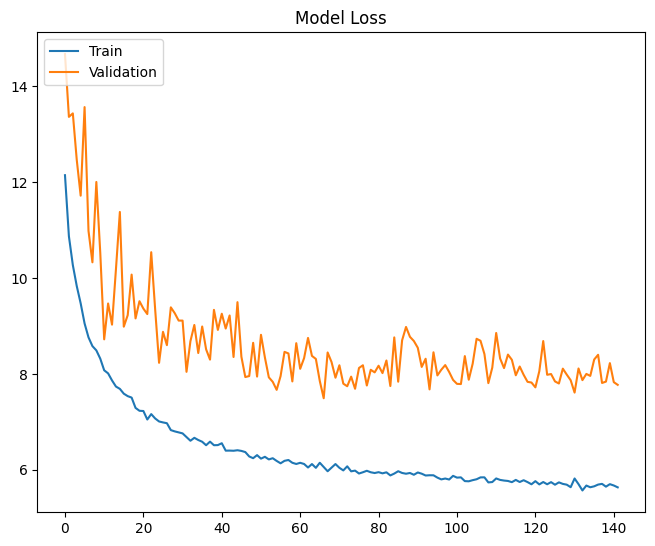

In [57]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.xlabel=('Epoch')
plt.ylabel=('Loss')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

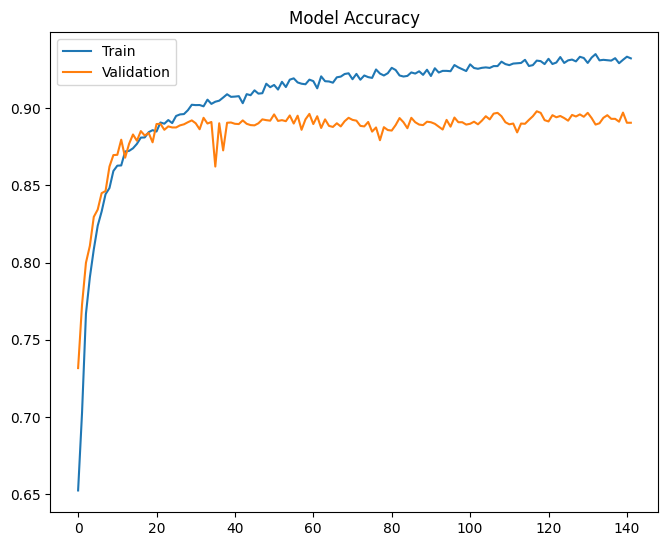

In [58]:
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.title('Model Accuracy')
plt.xlabel=('Epoch')
plt.ylabel=('Loss')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

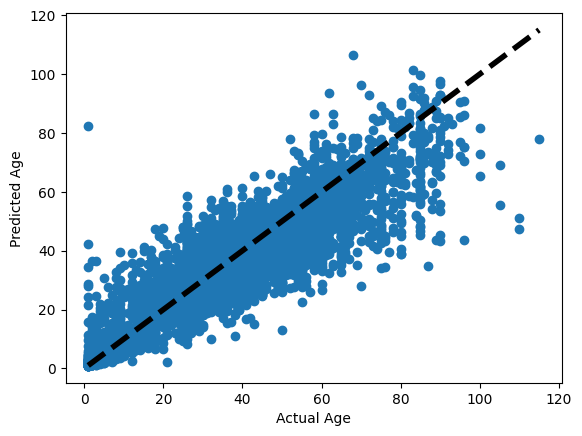

In [63]:
fig,ax=plt.subplots()
ax.scatter(Y_test_2[1],pred[1])
ax.plot([Y_test_2[1].min(),Y_test_2[1].max()],[Y_test_2[1].min(),Y_test_2[1].max()],'k--',lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show()

## Making Report of the Model (Gender Only)

In [92]:
i=0
pred_1=[]
while(i<len(pred[0])):
    pred_1.append(int(np.round(pred[0][i])))
    i=i+1

C:\Users\thega\AppData\Local\Temp\ipykernel_14316\463674450.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred_1.append(int(np.round(pred[0][i])))


In [89]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [90]:
report=classification_report(Y_test_2[0],pred_1)

In [91]:
print(report)

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      3131
           1       0.89      0.87      0.88      2796

    accuracy                           0.89      5927
   macro avg       0.89      0.89      0.89      5927
weighted avg       0.89      0.89      0.89      5927



## Making Heatmap of the Model (Gender Only)

In [85]:
results=confusion_matrix(Y_test_2[0],pred_1)

<Axes: >

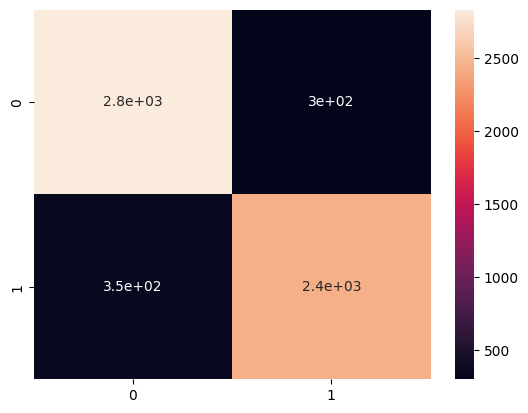

In [86]:
import seaborn as sns
sns.heatmap(results,annot=True)

## Testing Images

In [87]:
def test_image(ind,images_f,images_f_2,Model):
    plt.imshow(images_f[ind])
    image_test=images_f_2[ind]
    pred_1=Model.predict(np.array([image_test]))
    sex_f=['Male','Female']
    age=int(np.round(pred_1[1][0]))
    sex=int(np.round(pred_1[0][0]))
    print("Predicted Age is "+ str(age))
    print("predicted Gender is "+ sex_f[sex])

### Test 1

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\thega\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\thega\AppData\Local\Temp\ipykernel_14316\1659634507.py", line 1, in <module>
    test_image(4,images_f,images_f_2,Model)
  File "C:\Users\thega\AppData\Local\Temp\ipykernel_14316\1685645934.py", line 4, in test_image
    pred_1=Model.predict(np.array([image_test]))
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\thega\OneDrive\Desktop\Agen\.conda\Lib\site-packages\keras\src\utils\traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "c:\Users\thega\OneDrive\Desktop\Agen\.conda\Lib\site-packages\keras\src\utils\traceback_utils.py", line 119, in error_handler
    filtered_tb = _process_traceback_frames(e.__traceback__)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: 

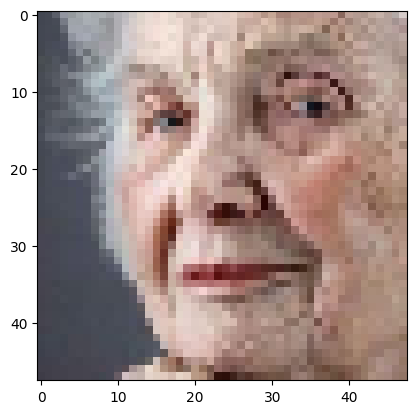

In [96]:
test_image(4,images_f,images_f_2,Model)

### Test 2

In [ ]:
test_image(23,images_f,images_f_2,Model)

### Test 3

In [ ]:
test_image(168,images_f,images_f_2,Model)

### Test 4

In [ ]:
test_image(888,images_f,images_f_2,Model)

### Test 5

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\thega\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\thega\AppData\Local\Temp\ipykernel_14316\636795301.py", line 1, in <module>
    test_image(1288,images_f,images_f_2,Model)
  File "C:\Users\thega\AppData\Local\Temp\ipykernel_14316\1685645934.py", line 4, in test_image
    pred_1=Model.predict(np.array([image_test]))
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\thega\OneDrive\Desktop\Agen\.conda\Lib\site-packages\keras\src\utils\traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "c:\Users\thega\OneDrive\Desktop\Agen\.conda\Lib\site-packages\keras\src\utils\traceback_utils.py", line 119, in error_handler
    filtered_tb = _process_traceback_frames(e.__traceback__)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError

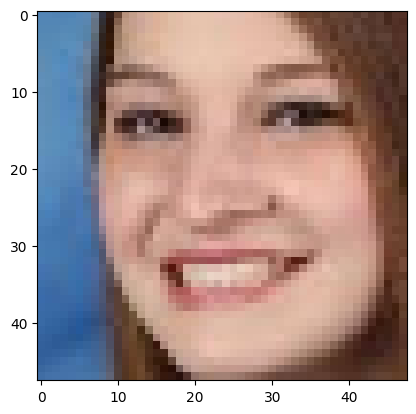

In [97]:
test_image(1288,images_f,images_f_2,Model)